## Imports

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

---
## Loading and exploring the dataset



__1. Load the dataset named carsales.csv and store it in a dataframe called `raw_df`.__

In [2]:
# Insert your code below
# ======================
path = %pwd
raw_df = pd.read_csv(path + "\\assets\\carsales.csv", index_col = 0)

__2. Print the `five` first rows of the dataframe__

In [3]:
# Insert your code below
# ======================
raw_df.head(5)

,Brand,Model,Year,Fuel,Horse Power,Engine Cylinders,Number of Doors,Market Categories,Vehicle Size,Vehicle Style,Miles Per Gallon (MPG),Retail Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2.0,"Luxury,Performance",Compact,Convertible,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2.0,"Luxury,High-Performance",Compact,Coupe,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2.0,"Luxury,Performance",Compact,Coupe,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2.0,Luxury,Compact,Convertible,18,34500


__3. Which columns in `raw_df` contains missing values?__

In [4]:
# Insert your code below
# ======================
# raw_df.info() # brief info of the raw data
# raw_df.isna().any() # return bool to detect which column contains missing values
raw_df.isnull().sum() # return integers to show how many missing values in the columns

Brand                        0
Model                        0
Year                         0
Fuel                         3
Horse Power                 69
Engine Cylinders            27
Number of Doors              6
Market Categories         2731
Vehicle Size                 0
Vehicle Style                0
Miles Per Gallon (MPG)       0
Retail Price                 0
dtype: int64

__4. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values? How many rows got removed?__

Use `df` in all following tasks unless otherwise is stated

In [5]:
# Insert your code below
# ======================
df = raw_df.copy()
print(df.shape)
df = df.dropna()
print(df.shape)
print("The number of removed rows: ", 
      raw_df.copy().shape[0] - df.shape[0])

(10257, 12)
(7441, 12)
The number of removed rows:  2816


__5. How many unique values exist in each of the columns `Brand` and `Fuel`__

In [6]:
# Insert your code below
# ======================
print("Unique values of Brand column is: ",
      df['Brand'].nunique())
print("Unique values of Fuel column is: ",
      df['Fuel'].nunique())

Unique values of Brand column is:  47
Unique values of Fuel column is:  8


__6. Which car brand has the most cars in the dataset?__

In [7]:
# Insert your code below
# ======================
df['Brand'].value_counts().head(1)

Chevrolet    607
Name: Brand, dtype: int64

__7. Find the average Retail Price per vehicle style.__

The output should be in the following format:
```python
Vehicle Style: [style], Average Price: [msrp]
Vehicle Style: [style], Average Price: [msrp]
Vehicle Style: [style], Average Price: [msrp]
...
```

In [8]:
# Insert your code below
# ======================
# df.groupby('Vehicle Style')['Retail Price'].mean()
for style, msrp in df.groupby('Vehicle Style')['Retail Price'].mean().iteritems():
    print(f'Vehicle Stype: {style :<20}, Average Price: {msrp :.3f}')

Vehicle Stype: 2dr Hatchback       , Average Price: 22904.551
Vehicle Stype: 2dr SUV             , Average Price: 42031.111
Vehicle Stype: 4dr Hatchback       , Average Price: 23684.597
Vehicle Stype: 4dr SUV             , Average Price: 42588.929
Vehicle Stype: Cargo Minivan       , Average Price: 22964.000
Vehicle Stype: Cargo Van           , Average Price: 30724.706
Vehicle Stype: Convertible         , Average Price: 102362.016
Vehicle Stype: Convertible SUV     , Average Price: 47975.000
Vehicle Stype: Coupe               , Average Price: 106314.173
Vehicle Stype: Crew Cab Pickup     , Average Price: 39032.567
Vehicle Stype: Extended Cab Pickup , Average Price: 32238.538
Vehicle Stype: Passenger Minivan   , Average Price: 29838.158
Vehicle Stype: Passenger Van       , Average Price: 35963.150
Vehicle Stype: Regular Cab Pickup  , Average Price: 28136.793
Vehicle Stype: Sedan               , Average Price: 56723.132
Vehicle Stype: Wagon               , Average Price: 36176.688


__8. Filter out non-gasoline cars.__

Remove rows where `Fuel == electric` or `Fuel == diesel` and print out the shape of the new dataframe. Save the results to `df_gasoline`

In [9]:
# Insert your code below
# ======================
# print(df.shape)
# print(df['Fuel'].value_counts())
df_gasoline = df[(df.Fuel != 'electric') & (df.Fuel != 'diesel')]
print(df_gasoline.shape)
# print(df_gasoline['Fuel'].value_counts())

(7284, 12)


__9. Convert miles per galon to liters per 10 km.__

Add a new column to `gasoline_df` with the fuel consumption measured in liters fuel used per 10km driven. Save the results in a new column named `liters_per_10km`.

Below is a function for converting miles per gallon to litres per 10km. Use this function to convert the values.

In [10]:
def mpg_to_liters_per_10km(mpg):
    """Returns miles per gallon converted to liters per 10km

    Args:
        mpg (int): Fuel efficiency measured in miles per gallon

    Returns:
        float: Fuel efficency measured in liters fuel used per 10 km driven
    """
    return 23.5 / mpg

In [11]:
# Insert your code below
# ======================
df_gasoline = df_gasoline.copy()
df_gasoline['liters_per_10km'] = df_gasoline['Miles Per Gallon (MPG)'].apply(lambda x: mpg_to_liters_per_10km(x))
df_gasoline.head(5)

,Brand,Model,Year,Fuel,Horse Power,Engine Cylinders,Number of Doors,Market Categories,Vehicle Size,Vehicle Style,Miles Per Gallon (MPG),Retail Price,liters_per_10km
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,19,46135,1.236842
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2.0,"Luxury,Performance",Compact,Convertible,19,40650,1.236842
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2.0,"Luxury,High-Performance",Compact,Coupe,20,36350,1.175000
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2.0,"Luxury,Performance",Compact,Coupe,18,29450,1.305556
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2.0,Luxury,Compact,Convertible,18,34500,1.305556


__10. Find the cars with the highest and lowest fuel consumption in `df_gasoline`. Print out the brand, model and consumption on the following format:__

```Python
 Lowest fuel consumption: [brand] [model], liters per 10km: [liters_per_10km]
Highest fuel consumption: [brand] [model], liters per 10km: [liters_per_10km]

```

In [12]:
# Insert your code below
# ======================
# df_gasoline.groupby(['Brand', 'Model'])['liters_per_10km'].agg(['min', 'max'])
L = df_gasoline['liters_per_10km'].argmin()
H = df_gasoline['liters_per_10km'].argmax()
print(f"Lowest fuel consumption: ", df_gasoline.iloc[L]['Brand'], df_gasoline.iloc[L]['Model'], ", liters per 10km:", df_gasoline.iloc[L]['liters_per_10km'] )
print(f"Highest fuel consumption: ", df_gasoline.iloc[H]['Brand'], df_gasoline.iloc[H]['Model'], ", liters per 10km:", df_gasoline.iloc[H]['liters_per_10km'] )

Lowest fuel consumption:  Toyota Prius , liters per 10km: 0.4051724137931034
Highest fuel consumption:  Ferrari Enzo , liters per 10km: 3.357142857142857


__11. Find all cars in the luxury category and print out the number of cars.__

The different cateogories that the cars belong to is stored in the `Market Categories` column. Use this to find all cars in the `Luxury` category. Save the results to `luxury_df`. Use `df` in this task

In [13]:
# Insert your code below
# ======================
# df['Market Categories'].value_counts()
print("The shape of exactly matched when Market Categories == 'Luxury'", df.loc[df['Market Categories'] == 'Luxury'].shape)
luxury_df = df.loc[df.loc[:, 'Market Categories'].str.contains("Luxury"), :]
print("The shape of matched if Market Categories contains 'Luxury'", luxury_df.shape)


The shape of exactly matched when Market Categories == 'Luxury' (622, 12)
The shape of matched if Market Categories contains 'Luxury' (2906, 12)


---
# Visualizing



__12. Create a plot with 2 vertical axes and one horizontal axis. The top plot should display a barchard containing the `count` of the `10 most frequent` car brands. The second plot should show the `count` of the most frequent fuel types. Both plots should show data in descending order. Use `df` in this task.__


Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/barplot_ca1.png"
     alt="Barchart example"
     style="width: 500px; margin-left: 0" />

PS: Disregard the color scheme of the example image.

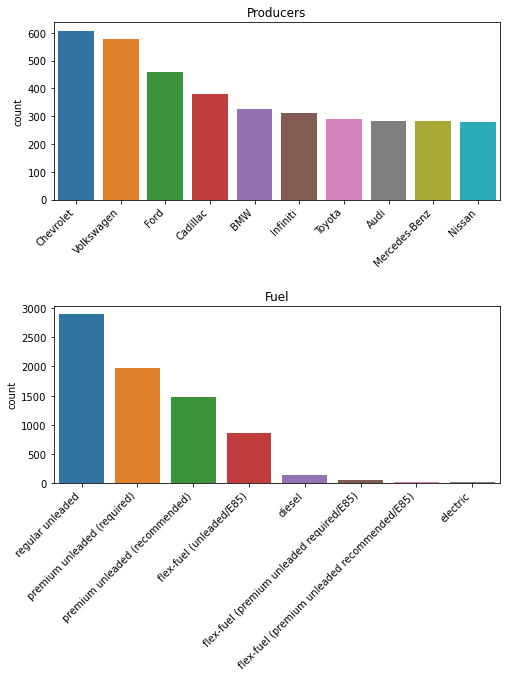

In [14]:
# Insert your code below
# ======================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.6)

p1 = sns.countplot(x = 'Brand', data = df, order = df['Brand'].value_counts()[:10, ].index, ax=ax1)
p1.set(xlabel=None)  # remove the axis label
p1.set_title("Producers") # set the title
p1.set_xticklabels(p1.get_xticklabels(), rotation=45, horizontalalignment='right') # rotate xlabels

p2 = sns.countplot(x = 'Fuel', data = df, order = df['Fuel'].value_counts()[:10, ].index, ax=ax2)
p2.set(xlabel=None)  # remove the axis label
p2.set_title("Fuel") # set the title
p2.set_xticklabels(p2.get_xticklabels(), rotation=45, horizontalalignment='right') # rotate xlabels

plt.show()

__13. Create a heatmap showing the correlation between the following columns in `df`:__
* Horse Power
* Engine Cylinders
* Miles Per Gallon (MPG)
* Retail Price
* Number of Doors
* Year

The output should look something like this:

<img src="assets/heatmap_ca1.png"
     alt="Heatmap example"
     style="width: 400; margin-left: 0" />


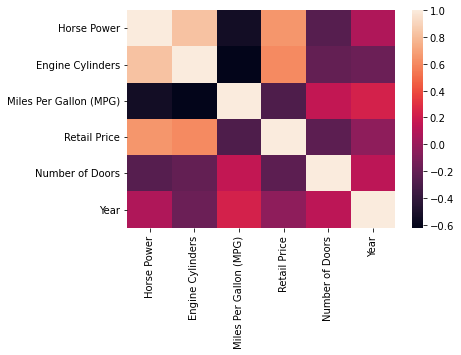

In [15]:
# Insert your code below
# ======================

correlation = df[['Horse Power', 'Engine Cylinders', 'Miles Per Gallon (MPG)', 'Retail Price', 'Number of Doors', 'Year']].corr()
sns.heatmap(correlation)
plt.show()

__14. Create a scatterplot with `Horse Power` on the x-axis and `liters_per_10km` on the y-axis. The color of the dots should correspond to the vehcle style. Use `df_gasoline` in this task.__

The output should look something like this:

<img src="assets/scatterplot_ca1.png"
     alt="Heatmap example"
     style="width: 200; height:200; margin-left: 0" />

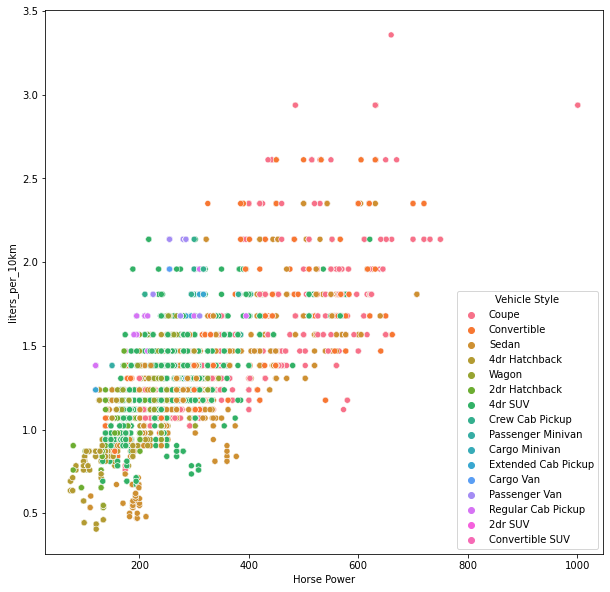

In [16]:
# Insert your code below
# ======================
fig = plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'Horse Power', y = 'liters_per_10km', data = df_gasoline, hue = 'Vehicle Style')
plt.show()